# Mengimport data dari url

In [ ]:
#membaca data dari url
import pandas as pd
url = "https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv"
df = pd.read_csv(url)
df

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141
...,...,...,...,...,...
115,116,Female,60+,152,152
116,117,Female,60+,161,152
117,118,Female,60+,165,174
118,119,Female,60+,149,151


## Mengolah data statistik

In [ ]:
df.describe()

,patient,bp_before,bp_after
count,120.000000,120.000000,120.000000
mean,60.500000,156.450000,151.358333
std,34.785054,11.389845,14.177622
min,1.000000,138.000000,125.000000
25%,30.750000,147.000000,140.750000
50%,60.500000,154.500000,149.500000
75%,90.250000,164.000000,161.000000
max,120.000000,185.000000,185.000000


In [ ]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# menentukan dataframe
xy = df['bp_before']

# mencari mean, median dan modus
mean = xy.mean()
median = xy.median()
modus = xy.mode()

# menampilkan ukuran nilai tengah
print('Mean: ',mean,'nMedian: ',median,'nModus: ',modus[0])

# membuat grafik
# plt.figure(figsize=(15,5))
# plt.hist(xy,bins=35,color='grey')
# plt.axvline(mean,color='red',label='Mean')
# plt.axvline(median,color='yellow',label='Median')
# plt.axvline(modus[0],color='green',label='Modus')
# plt.xlabel('bp_before')
# plt.ylabel('frekuensi')
# plt.legend()
# plt.show()

Mean:  156.45 nMedian:  154.5 nModus:  142


In [ ]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# menentukan dataframe
xy = df['bp_after']

# mencari mean, median dan modus
mean = xy.mean()
median = xy.median()
modus = xy.mode()

# menampilkan ukuran nilai tengah
print('Mean: ',mean,'nMedian: ',median,'nModus: ',modus[0])

# membuat grafik
# plt.figure(figsize=(15,5))
# plt.hist(xy,bins=35,color='grey')
# plt.axvline(mean,color='red',label='Mean')
# plt.axvline(median,color='yellow',label='Median')
# plt.axvline(modus[0],color='green',label='Modus')
# plt.xlabel('bp_before')
# plt.ylabel('frekuensi')
# plt.legend()
# plt.show()

Mean:  151.35833333333332 nMedian:  149.5 nModus:  135


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patient    120 non-null    int64 
 1   sex        120 non-null    object
 2   agegrp     120 non-null    object
 3   bp_before  120 non-null    int64 
 4   bp_after   120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


In [ ]:
from numpy.core.defchararray import count
import pandas as pd
import numpy as np
import numpy as np
from math import log2

def main():
    s = pd.read_csv(url)
    print("******************************************************")
    print("Entropy Discretization                         STARTED")
    s = entropy_discretization(s)
    print("Entropy Discretization                         COMPLETED")

# This method discretizes attribute A1
# If the information gain is 0, i.e the number of 
# distinct class is 1 or
# If min f/ max f < 0.5 and the number of distinct values is floor(n/2)
# Then that partition stops splitting.
# This method discretizes s A1
# If the information gain is 0, i.e the number of 
# distinct class is 1 or
# If min f/ max f < 0.5 and the number of distinct values is floor(n/2)
# Then that partition stops splitting.
def entropy_discretization(s):

    I = {}
    i = 0
    while(uniqueValue(s)):
        # Step 1: pick a threshold
        threshold = df['A1'].iloc[0]

        # Step 2: Partititon the data set into two parttitions
        df1 = s[s['bp_before'] < threshold]
        print("s1 after spitting")
        print(s1)
        print("******************")
        s2 = s[s['bp_before'] >= threshold]
        print("s2 after spitting")
        print(s2)
        print("******************")
            
        # Step 3: calculate the information gain.
        informationGain = information_gain(s1,s2,s)
        I.update({f'informationGain_{i}':informationGain,f'threshold_{i}': threshold})
        print(f'added informationGain_{i}: {informationGain}, threshold_{i}: {threshold}')
        s = s[s['A1'] != threshold]
        i += 1

    # Step 5: calculate the min information gain
    n = int(((len(I)/2)-1))
    print("Calculating minimum threshold")
    print("*****************************")
    minInformationGain = 0
    minThreshold       = 0 
    for i in range(0, n):
        if(I[f'informationGain_{i}'] < minInformationGain):
            minInformationGain = I[f'informationGain_{i}']
            minThreshold       = I[f'threshold_{i}']

    print(f'minThreshold: {minThreshold}, minInformationGain: {minInformationGain}')

    # Step 6: keep the partitions of S based on the value of threshold_i
    minPartition(minInformationGain,minThreshold,s,s1,s2)

def uniqueValue(s):
    # are records in s the same? return true
    if s.nunique()['bp_before'] == 1:
        return False
    # otherwise false 
    else:
        return True

def minPartition(minInformationGain,minThreshold,s,s1,s2):
    print(f'informationGain: {minInformationGain}, threshold: {minThreshold}')
    merged_partitions =  pd.merge(s1,s2)
    merged_partitions =  pd.merge(merged_partitions,s)
    print("Best Partition")
    print("***************")
    print(merged_partitions)
    print("***************")
    return merged_partitions




def information_gain(s1, s2, s):
    # calculate cardinality for s1
    cardinalityS1 = len(pd.Index(s1['A1']).value_counts())
    print(f'The Cardinality of s1 is: {cardinalityS1}')
    # calculate cardinality for s2
    cardinalityS2 = len(pd.Index(s2['A1']).value_counts())
    print(f'The Cardinality of s2 is: {cardinalityS2}')
    # calculate cardinality of s
    cardinalityS = len(pd.Index(s['A1']).value_counts())
    print(f'The Cardinality of s is: {cardinalityS}')
    # calculate informationGain
    informationGain = (cardinalityS1/cardinalityS) * entropy(s1) + (cardinalityS2/cardinalityS) * entropy(s2)
    print(f'The total informationGain is: {informationGain}')
    return informationGain



def entropy(s):
    print("calculating the entropy for s")
    print("*****************************")
    print(s)
    print("*****************************")

    # initialize ent
    ent = 0

    # calculate the number of classes in s
    numberOfClasses = s['Class'].nunique()
    print(f'Number of classes for dataset: {numberOfClasses}')
    value_counts = s['Class'].value_counts()
    p = []
    for i in range(0,numberOfClasses):
        n = s['Class'].count()
        # calculate the frequency of class_i in S1
        print(f'p{i} {value_counts.iloc[i]}/{n}')
        f = value_counts.iloc[i]
        pi = f/n
        p.append(pi)
    
    print(p)

    for pi in p:
        ent += -pi*log2(pi)

    return ent

main()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


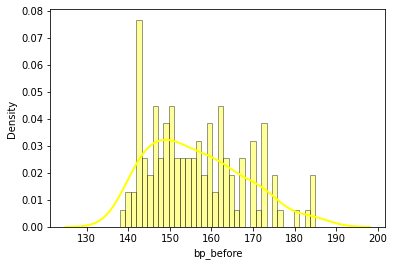

In [ ]:
import seaborn as sns
sns.distplot(df['bp_before'], 
hist=True, 
kde=True, 
bins=int(180/5), 
color='yellow', 
hist_kws= {'edgecolor':'black'}, 
kde_kws={'linewidth':2})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


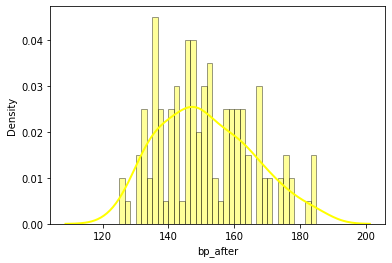

In [ ]:
import seaborn as sns
sns.distplot(df['bp_after'], 
hist=True, 
kde=True, 
bins=int(180/5), 
color='yellow', 
hist_kws= {'edgecolor':'black'}, 
kde_kws={'linewidth':2})